In [1]:
import h5py as h5
import pygsp as pg
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
def plot_mollweide(graph, signal=None, ax=None, **kwargs):
    crs = ax.projection
    ax.coastlines()
    ax.set_global()
    graph.set_coordinates('sphere', dim=2)
    graph.coords *= 180/np.pi
    graph.coords = crs.transform_points(ccrs.Geodetic(), *graph.coords.T)[:, :2]
    graph.plot(signal, ax=ax, **kwargs)

def plot_spherical_graph(graph, values=None):
    print(graph)
    fig = plt.figure(figsize=(17, 5))

    ax = fig.add_subplot(1, 1, 1, projection='3d')
    graph.set_coordinates('sphere', dim=3)
    graph.plot(indices=True, ax=ax, title='3D', vertex_color=values)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # ax = fig.add_subplot(1, 3, 2)
    # graph.set_coordinates('sphere', dim=2)
    # graph.plot(indices=True, ax=ax, title='Equirectangular projection')
    # ax.set_xlabel('longitude [radians]')
    # ax.set_ylabel('latitude [radians]')

    # # ax = fig.add_subplot(1, 3, 3, projection='mollweide')
    # # graph.plot(indices=True, ax=ax, title='Mollweide projection (equi-area)')

    # ax = fig.add_subplot(1, 3, 3, projection=ccrs.Mollweide())
    # plot_mollweide(graph, ax=ax, indices=True, title='Mollweide projection')

    fig.tight_layout()

8
8
768 7758
SphereHealpix(n_vertices=768, n_edges=7758, subdivisions=8, nest=False, standardize=False, metric=euclidean, order=2, kind=knn, k=20, kernel=gaussian, kernel_width=1.27e-01, backend=scipy-ckdtree)


/Users/reza/Career/DMLab/SURROGATE/.venv/lib/python3.9/site-packages/pygsp/plotting.py:539: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = ax.scatter(*G.coords.T,


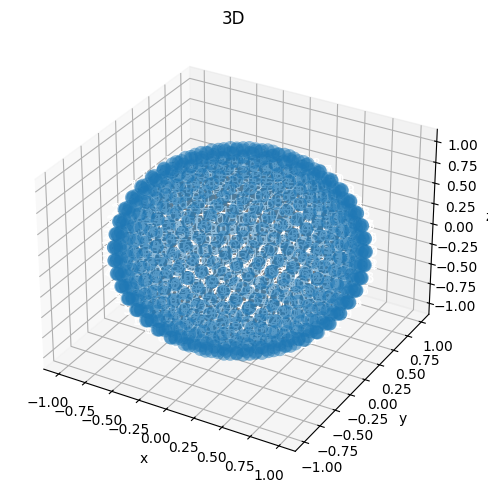

In [3]:
# Illustration.
graph = pg.graphs.SphereHealpix(8)
print(graph.n_vertices, graph.n_edges)
plot_spherical_graph(graph)

2
2
SphereHealpix(n_vertices=48, n_edges=204, subdivisions=2, nest=True, standardize=False, metric=euclidean, order=2, kind=knn, k=8, kernel=gaussian, kernel_width=4.00e-01, backend=scipy-ckdtree)


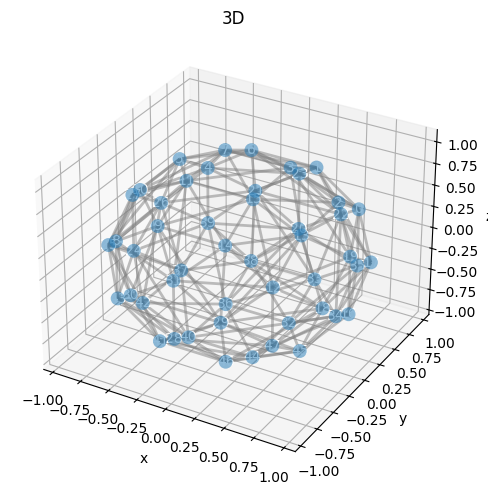

In [4]:

graph = pg.graphs.SphereHealpix(2, k=8, nest=True)
plot_spherical_graph(graph)

12288
32


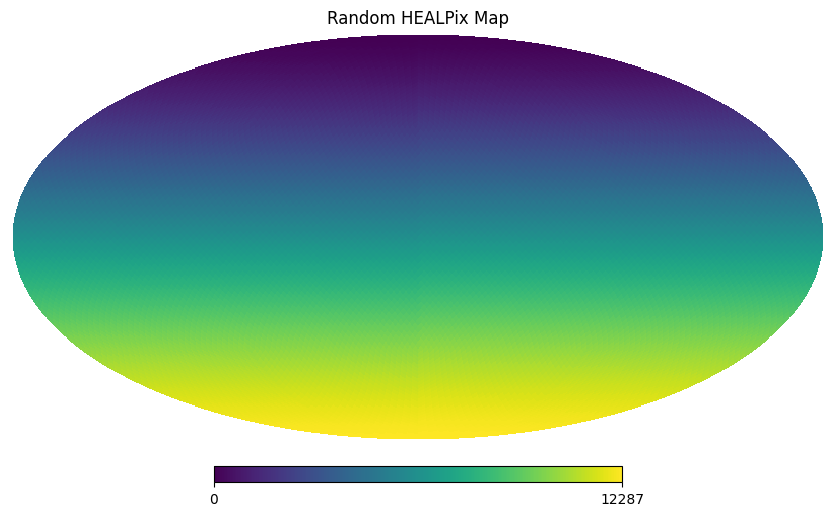

In [5]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Define HEALPix resolution parameter
nside = 32  # Must be a power of 2 (e.g., 2, 4, 8, 16, ...)

# Total number of pixels in the HEALPix scheme
npix = hp.nside2npix(nside)

print(npix)

# Create a simple map where each pixel has a random value
map_data = np.arange(npix)

# Plot the HEALPix map
hp.mollview(map_data, title="Random HEALPix Map", cmap="viridis")
plt.show()

In [6]:
import cv2
import pygsp as pg
import healpy as hp
import numpy as np
from pyhdf.SD import SD, SDC
from matplotlib import pyplot as plt

In [7]:
def read_hdf(hdf_path, dataset_names):
    f = SD(hdf_path, SDC.READ)
    datasets = []
    for dataset_name in dataset_names:
        datasets.append(f.select(dataset_name).get())
    return datasets

In [8]:
cube, i, j, k = read_hdf(
    "/Users/reza/Career/DMLab/SURROGATE/Data/psi_web_sample/train/cr1732/kpo_mas_mas_std_0101/br002.hdf",
["Data-Set-2", "fakeDim0", "fakeDim1", "fakeDim2"])

In [9]:
cube.shape, i.shape, j.shape, k.shape

((128, 110, 141), (128,), (110,), (141,))

In [10]:
cube = cube.transpose(2, 1, 0)

In [11]:
cube.shape

(141, 110, 128)

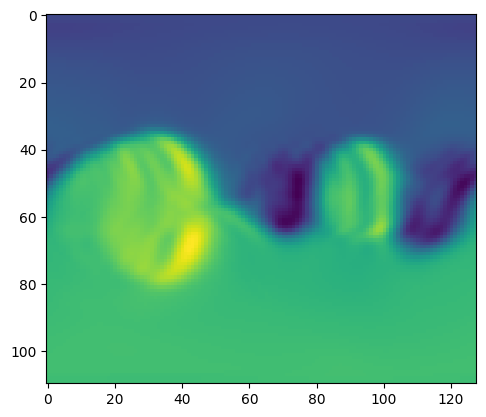

In [12]:
plt.imshow(cube[0, :, :])

In [13]:
def resize_3d(array, new_height):
    resized_array = np.zeros((array.shape[0], new_height, array.shape[2]))
    
    for i in range(array.shape[0]):
        resized_array[i] = cv2.resize(array[i], (array.shape[2], new_height), interpolation=cv2.INTER_LINEAR)
    
    return resized_array

In [14]:
x = resize_3d(cube, 96)

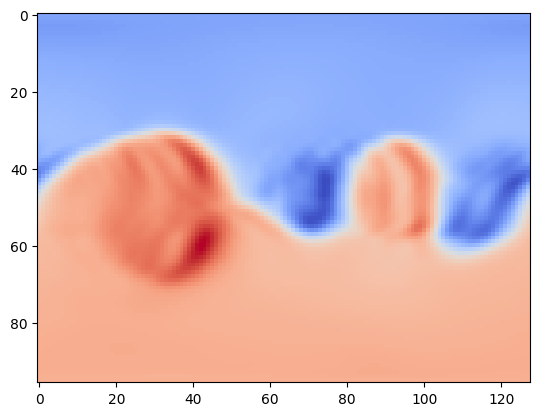

In [15]:
plt.imshow(x[0, :, :], cmap='coolwarm')

12288
32


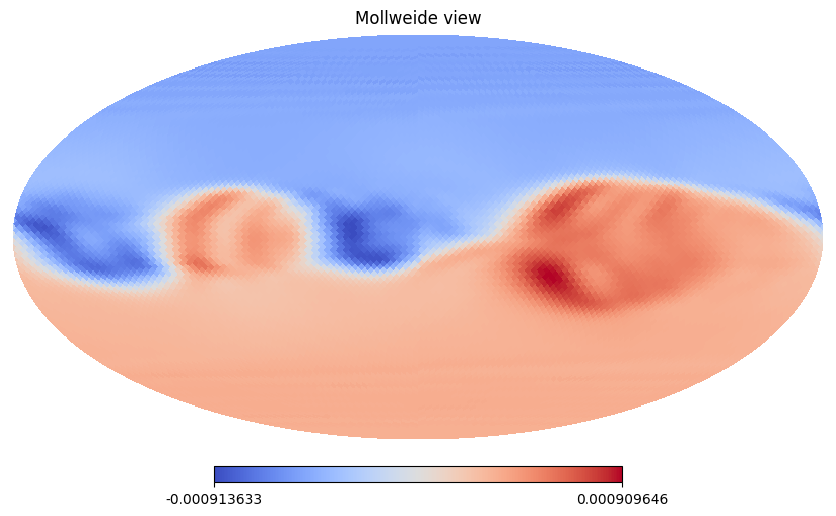

In [16]:
nside = 32  # Must be a power of 2 (e.g., 2, 4, 8, 16, ...)

# Total number of pixels in the HEALPix scheme
npix = hp.nside2npix(nside)

print(npix)

# Create a simple map where each pixel has a random value
map_data = x[0, :, :].ravel()

# Plot the HEALPix map
hp.mollview(map_data, cmap="coolwarm")
plt.show()

32
32
SphereHealpix(n_vertices=12288, n_edges=49668, subdivisions=32, nest=False, standardize=False, metric=euclidean, order=2, kind=knn, k=8, kernel=gaussian, kernel_width=2.50e-02, backend=scipy-ckdtree)


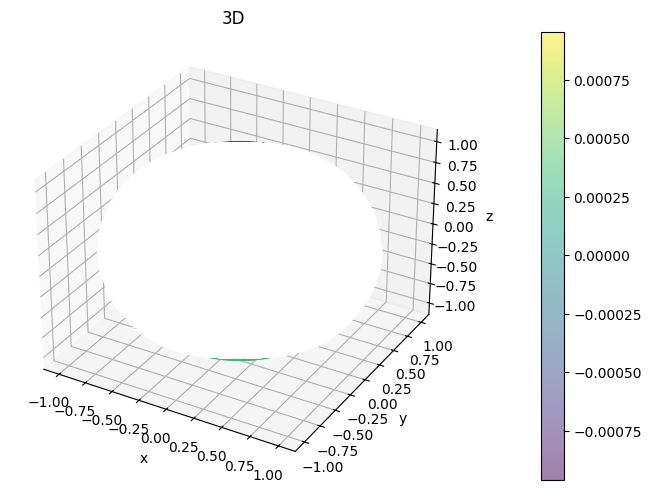

In [17]:
graph = pg.graphs.SphereHealpix(32, k=8)
plot_spherical_graph(graph, values=map_data)